In [1]:
library(tidyverse)
library(nycflights13)
library(lubridate)

# library(GGally)
# library(arm)

# to use original type
# stats::filter()
#  stats::lag()

# nycflights13::flights
# ?nycflights13::flights

# filter()
# arrange()
# select()
# mutate()
# summarize()
# group_by()

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.0     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'nycflights13' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built 

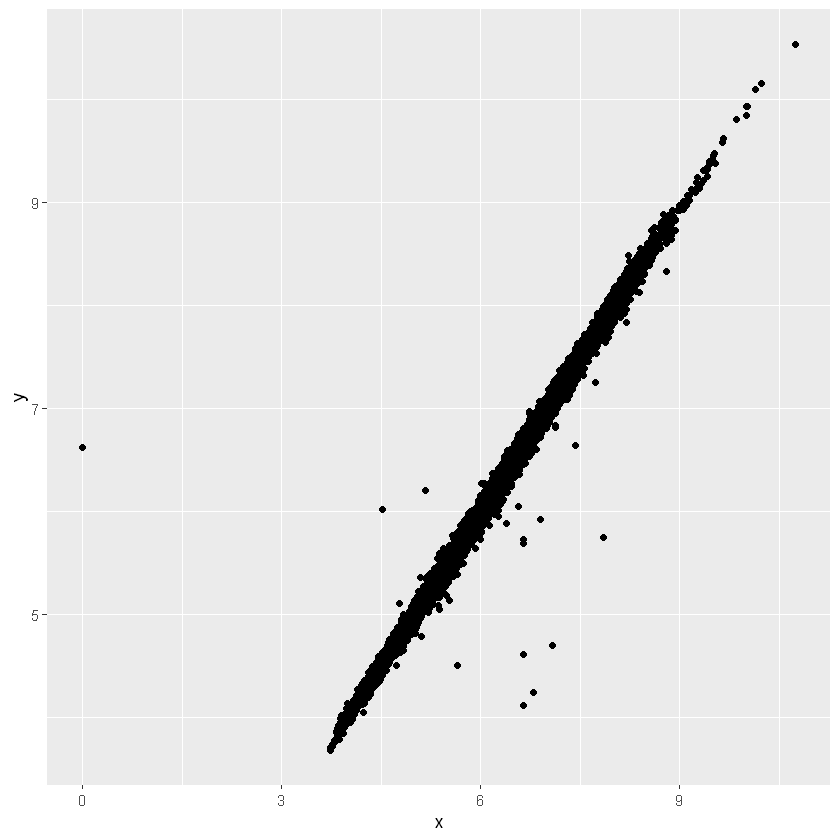

In [4]:
diamonds2 <- diamonds %>%
mutate(y = ifelse(y < 3 | y > 20, NA, y))

ggplot(data = diamonds2, mapping = aes(x = x, y = y)) +
geom_point(na.rm = TRUE)

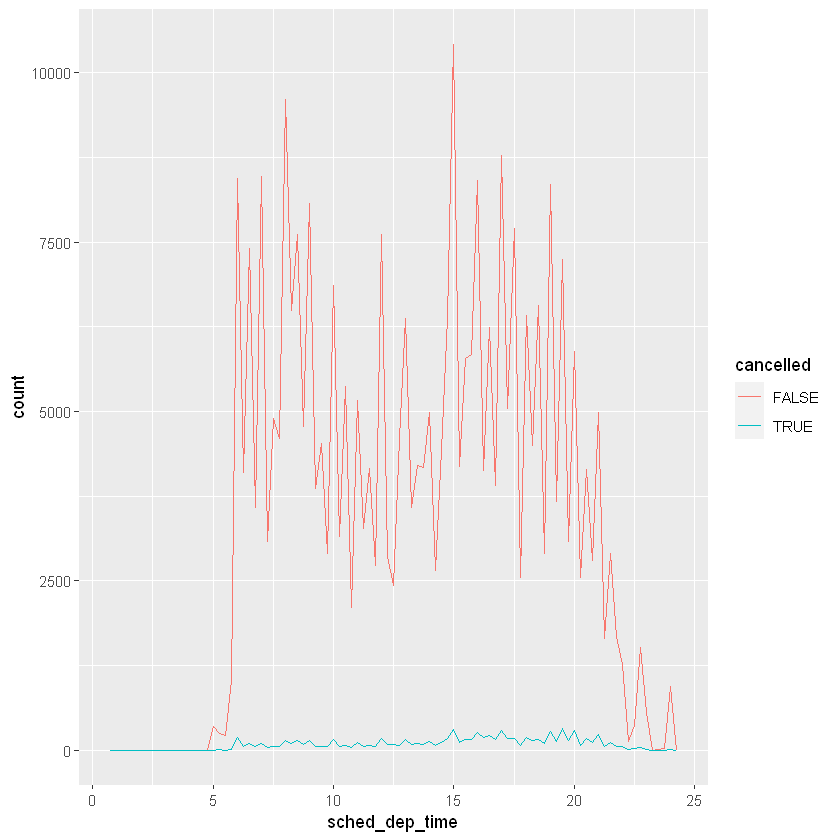

In [5]:
nycflights13::flights %>%
mutate(
cancelled = is.na(dep_time),
sched_hour = sched_dep_time %/% 100,
sched_min = sched_dep_time %% 100,
sched_dep_time = sched_hour + sched_min / 60
) %>%
ggplot(mapping = aes(sched_dep_time)) +
geom_freqpoly(
mapping = aes(color = cancelled),
binwidth = 1/4
)

Warning message:
"Removed 1 rows containing non-finite values (stat_count)."

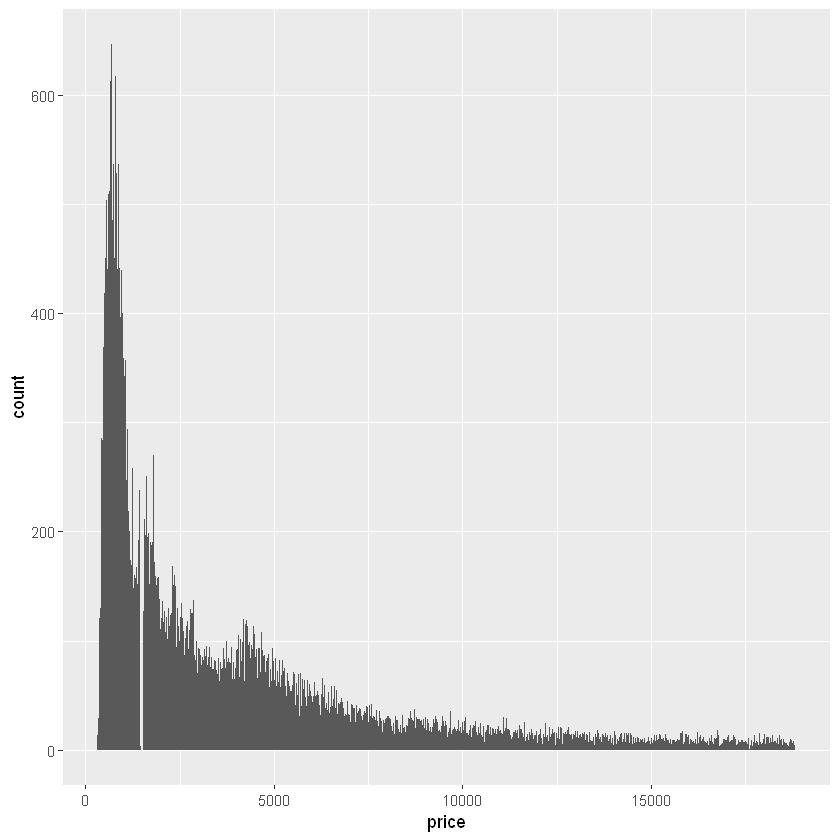

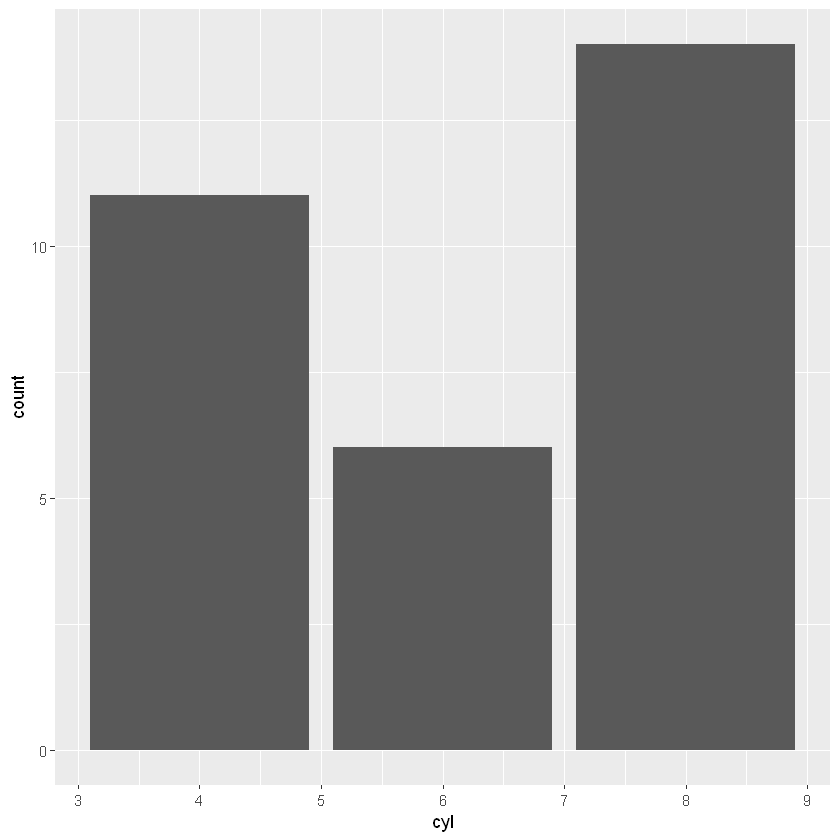

In [7]:
# Exercise Page 93
# 1

diamonds %>%
  ggplot(aes(price)) +
  geom_histogram(bins = 1000)
# histogram, they simply leave a gap in the distribution

# barplot,`NA` value.


mtcars[1, 2] <- NA

mtcars %>%
  ggplot(aes(cyl)) +
  geom_bar()

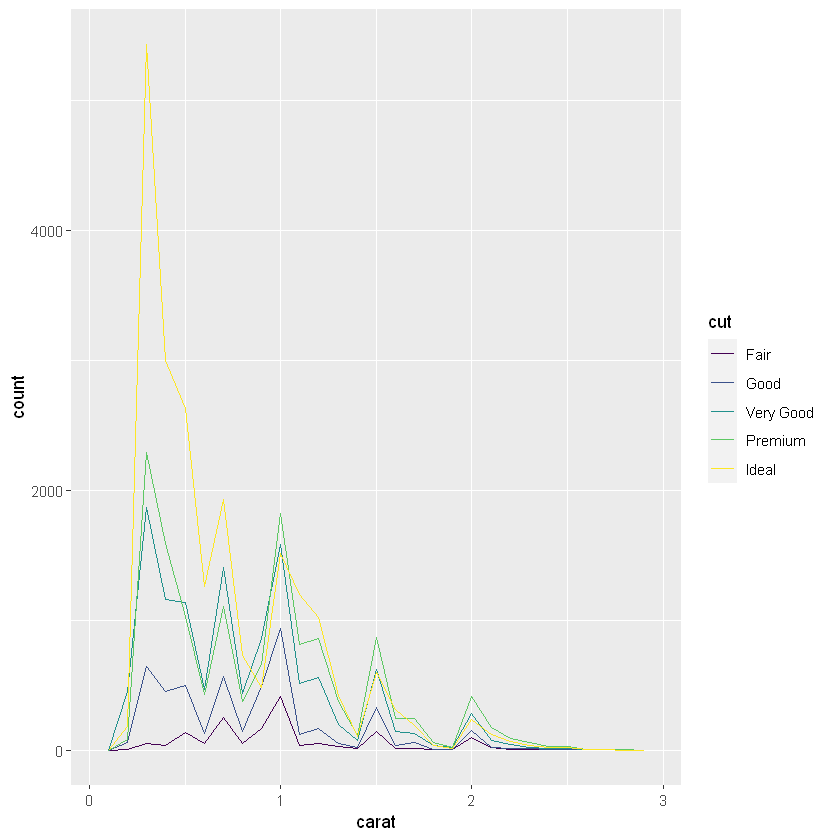

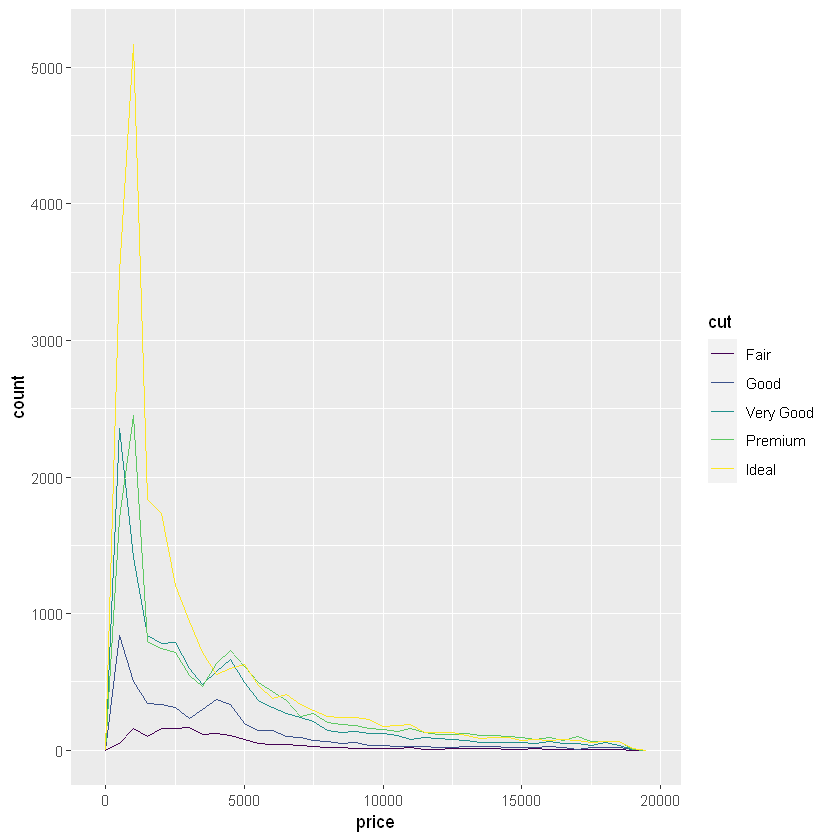

In [10]:
smaller <- diamonds %>%
filter(carat < 3)


ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
geom_freqpoly(binwidth = 0.1)

#-------------------------------------------------------------------------------


ggplot(data = diamonds, mapping = aes(x = price)) +
geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

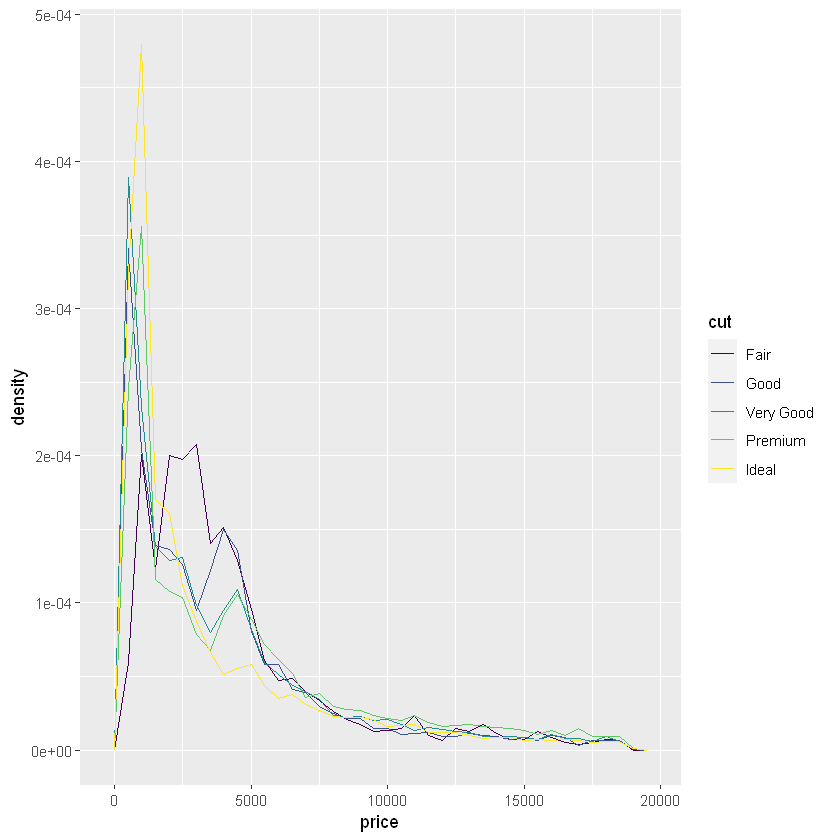

In [11]:
ggplot(
data = diamonds,
mapping = aes(x = price, y = ..density..)
) +
geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

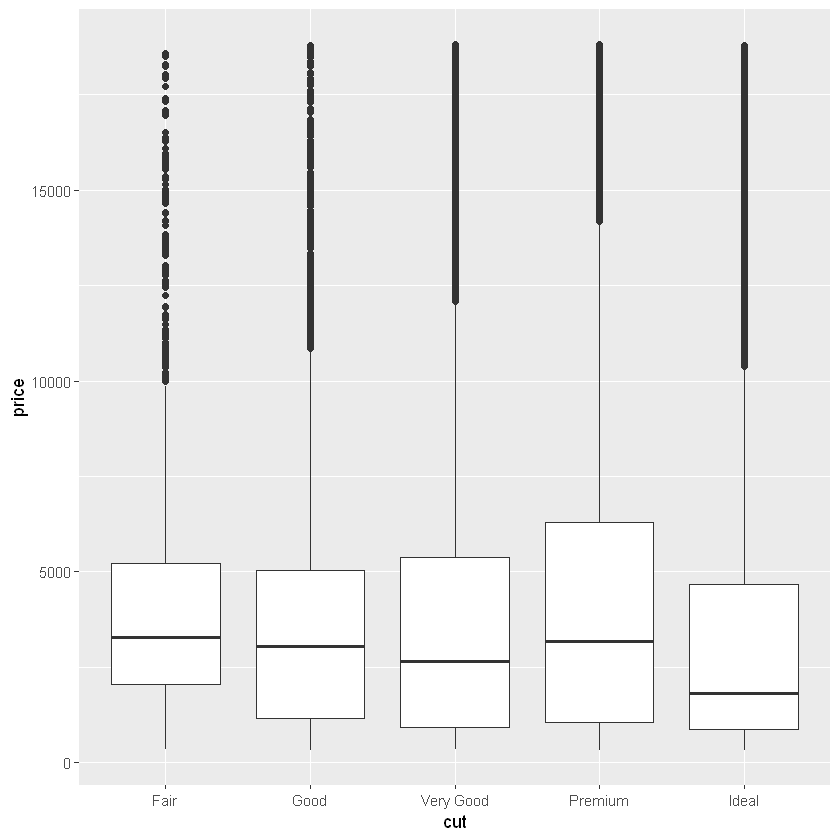

In [12]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
geom_boxplot()

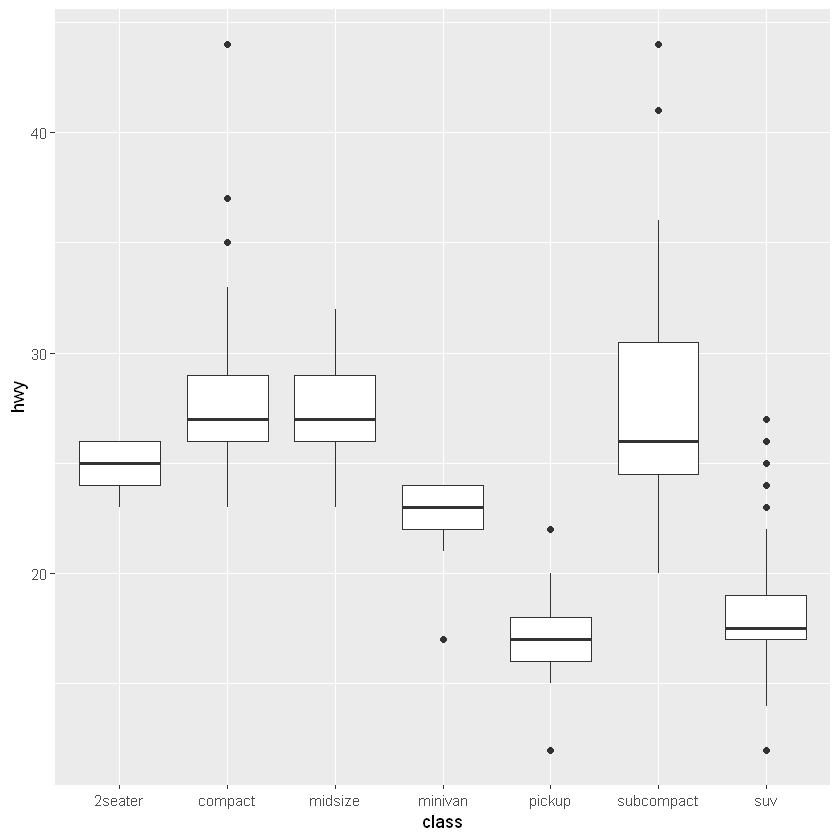

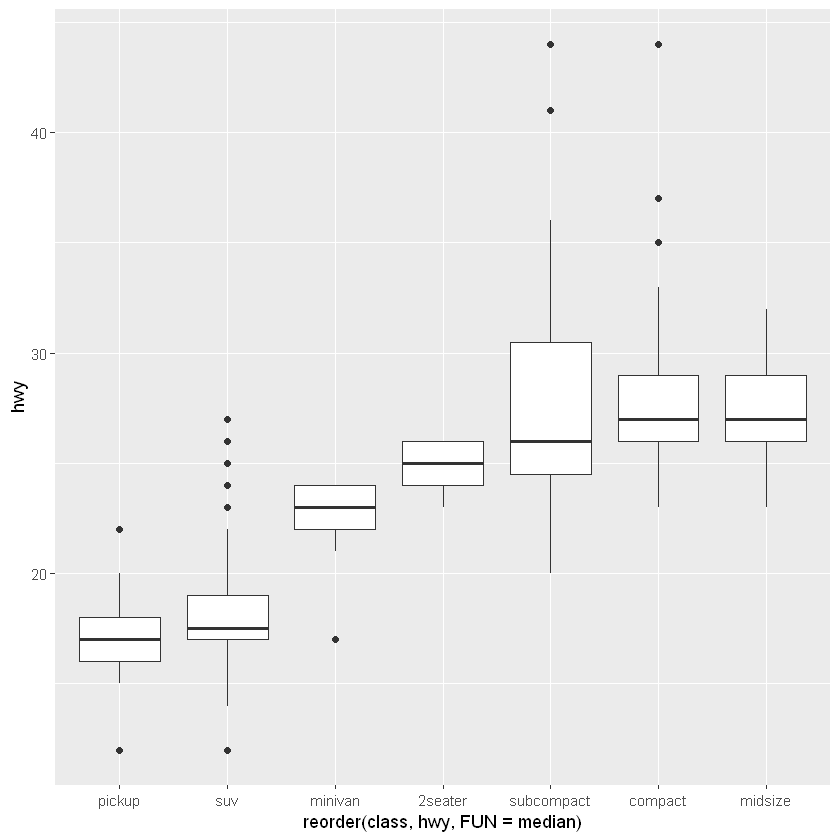

In [15]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
geom_boxplot()

ggplot(data = mpg) +
geom_boxplot(
mapping = aes(
x = reorder(class, hwy, FUN = median),
y = hwy
)
) #+ coord_flip()

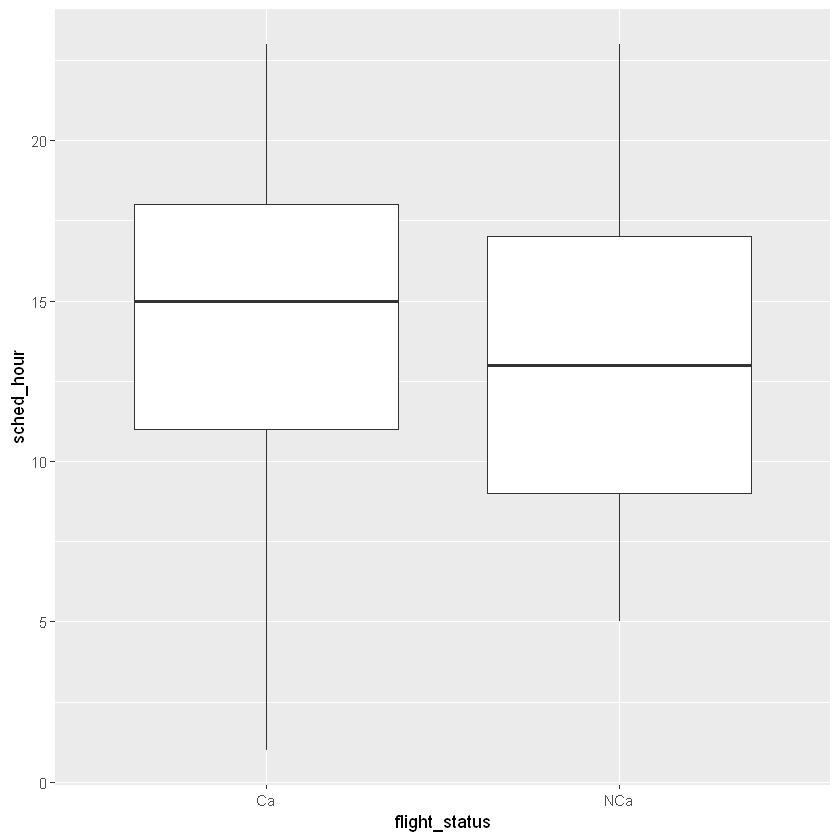

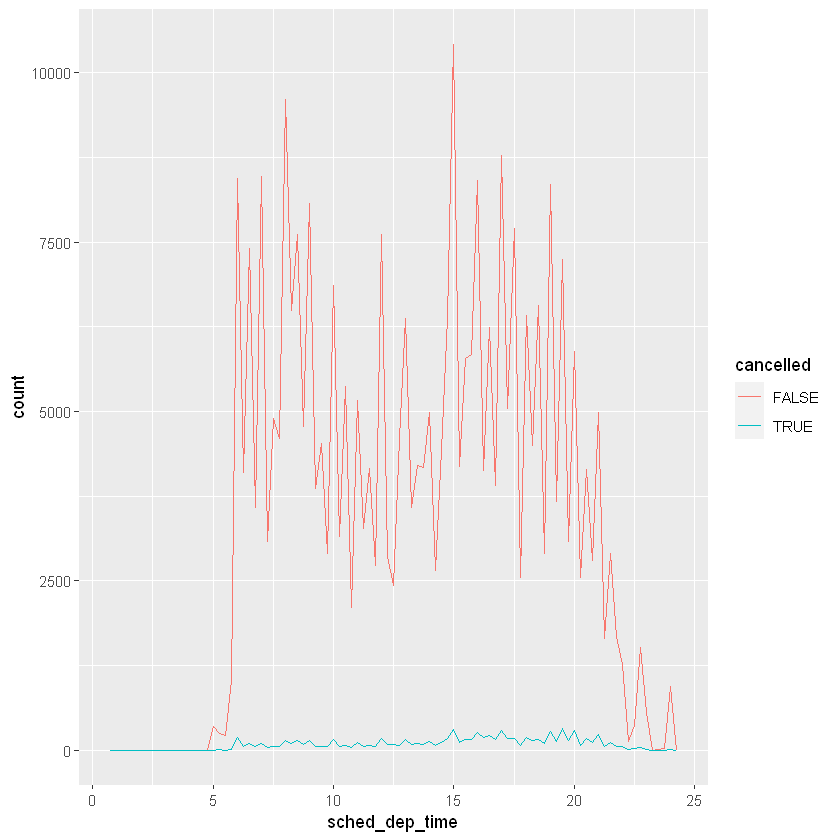

In [34]:
# Execcise Page 99
# Problem 1
# Me

flights %>%
    mutate(
        flight_status = ifelse(is.na(dep_time),'Ca','NCa'),
        sched_hour = sched_dep_time %/% 100,
        sched_min = sched_dep_time %% 100,
        sched_dep_time = sched_hour + sched_min / 60
    ) %>% 
    ggplot(aes(y = sched_hour)) +
    geom_boxplot(aes(x = flight_status))
    
# Book

nycflights13::flights %>%
mutate(
cancelled = is.na(dep_time),
sched_hour = sched_dep_time %/% 100,
sched_min = sched_dep_time %% 100,
sched_dep_time = sched_hour + sched_min / 60
) %>%
ggplot(mapping = aes(sched_dep_time)) +
geom_freqpoly(
mapping = aes(color = cancelled),
binwidth = 1/4
)

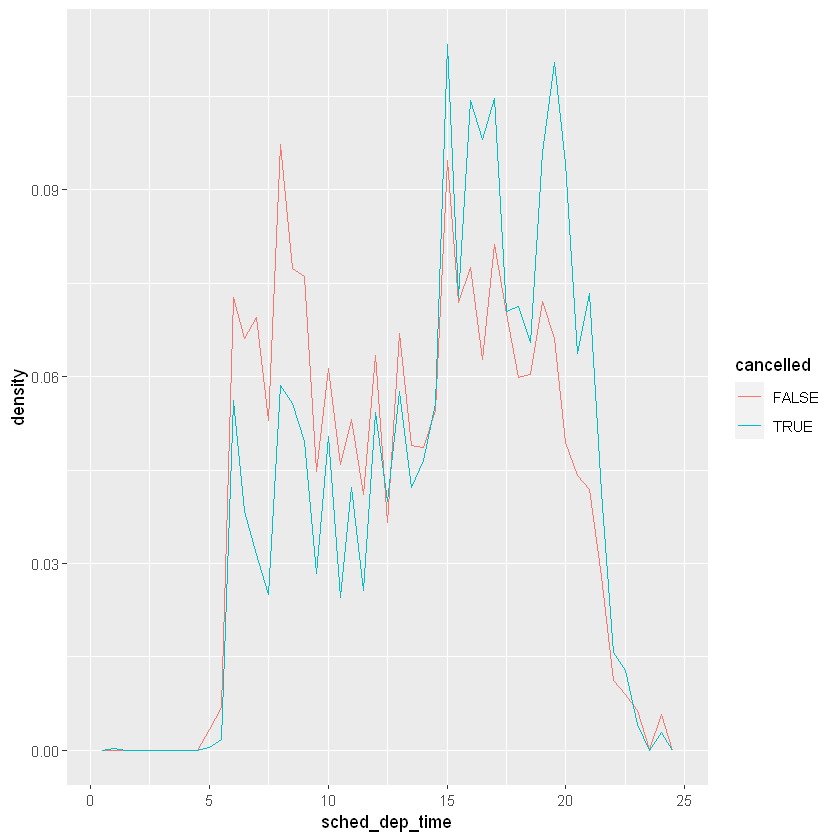

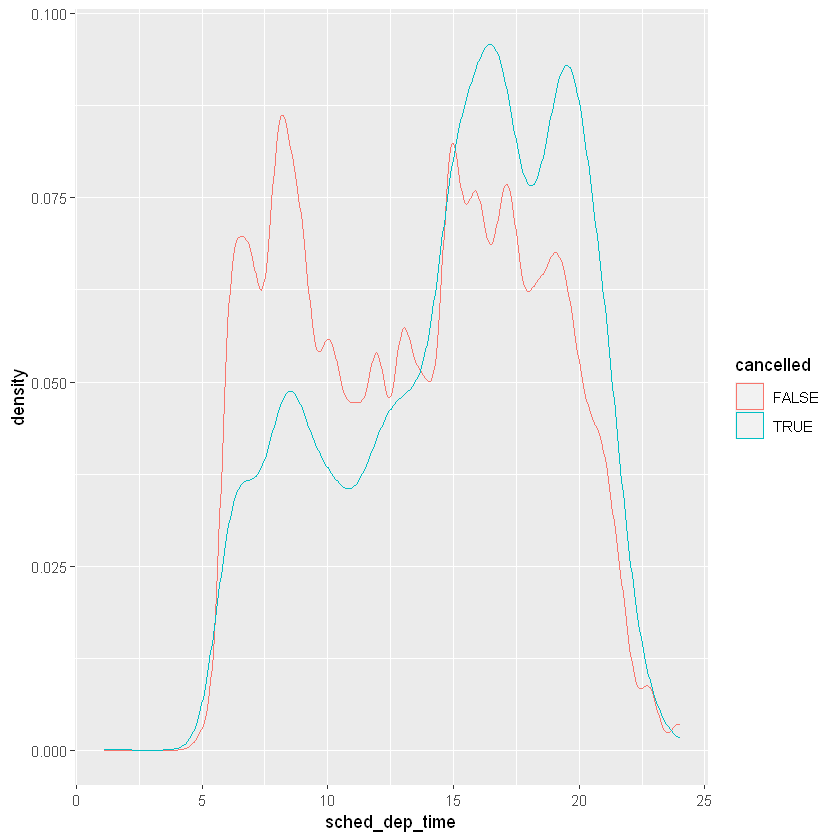

In [35]:
# Execcise Page 99
# Problem 1

fl <- 
  flights %>%
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  )

fl %>%
  ggplot(aes(sched_dep_time, ..density.., colour = cancelled)) +
  geom_freqpoly(binwidth = 1/2)

fl %>%
  ggplot(aes(sched_dep_time, colour = cancelled)) +
  geom_density()

cut,"cor(carat, price)"
Fair,0.8592985
Good,0.9224716
Very Good,0.9263704
Premium,0.9250047
Ideal,0.9311760


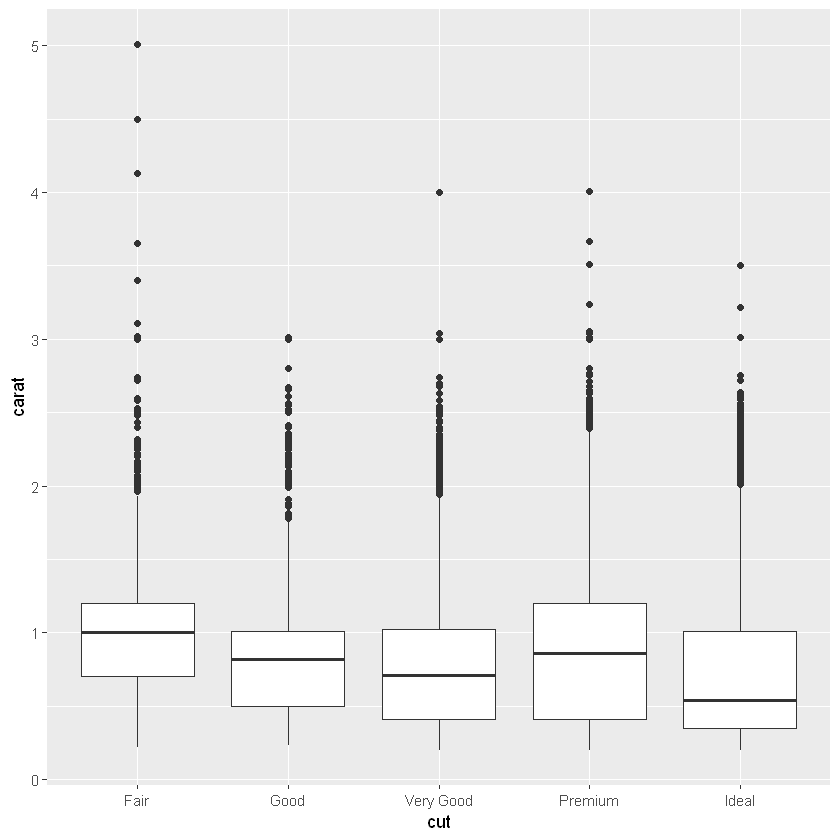

In [40]:
# Execcise Page 99
# Problem 2

# display(lm(price ~ ., diamonds), detail = T)

diamonds %>%
  ggplot(aes(cut, carat)) +
  geom_boxplot()

diamonds %>%
  group_by(cut) %>%
  summarise(cor(carat, price))

In [41]:
# Execcise Page 99
# Problem 3

library(ggstance)

diamonds %>%
  ggplot(aes(cut, carat)) +
  geom_boxplot() +
  coord_flip()

diamonds %>%
  ggplot(aes(carat, cut)) +
  geom_boxploth()


ERROR: Error in library(ggstance): there is no package called 'ggstance'


In [42]:
# Execcise Page 99
# Problem 4

library(lvplot)

p <- ggplot(diamonds, aes(cut, price, colour = ..LV..))
p + geom_lv()

p <- ggplot(diamonds, aes(cut, carat, fill = ..LV..))
p + geom_lv()

ERROR: Error in library(lvplot): there is no package called 'lvplot'


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


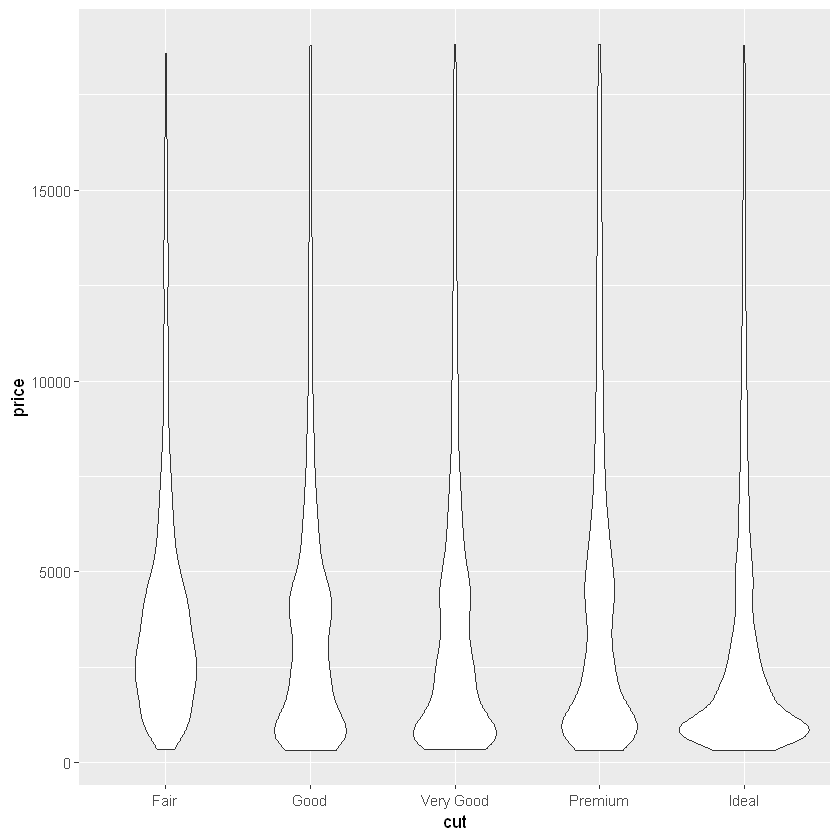

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


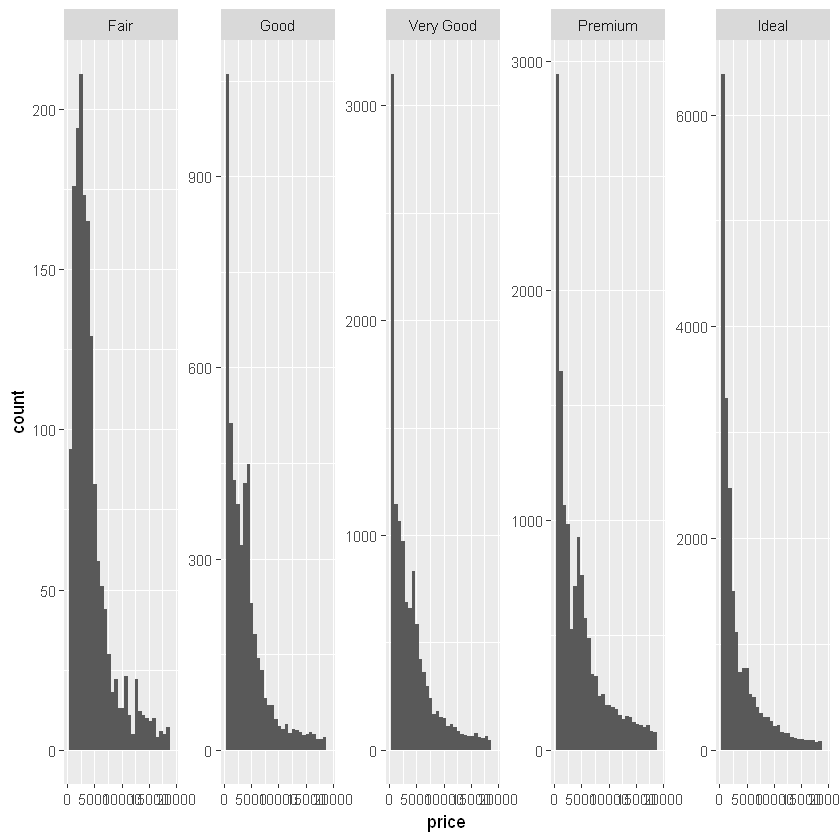

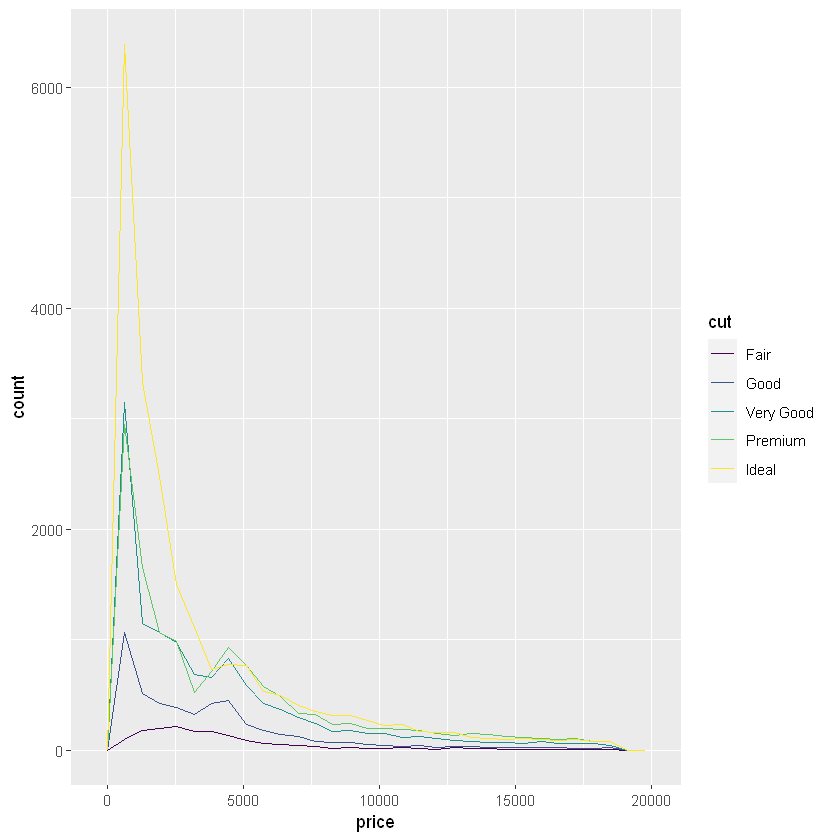

In [43]:
# Execcise Page 99
# Problem 5

diamonds %>%
  ggplot(aes(cut, price)) +
  geom_violin()

diamonds %>%
  ggplot(aes(price)) +
  geom_histogram() +
  facet_wrap(~ cut, scale = "free_y", nrow = 1)

diamonds %>%
  ggplot(aes(price)) +
  geom_freqpoly(aes(colour = cut))

In [ ]:
# Execcise Page 99
# Problem 6
# need to be solved


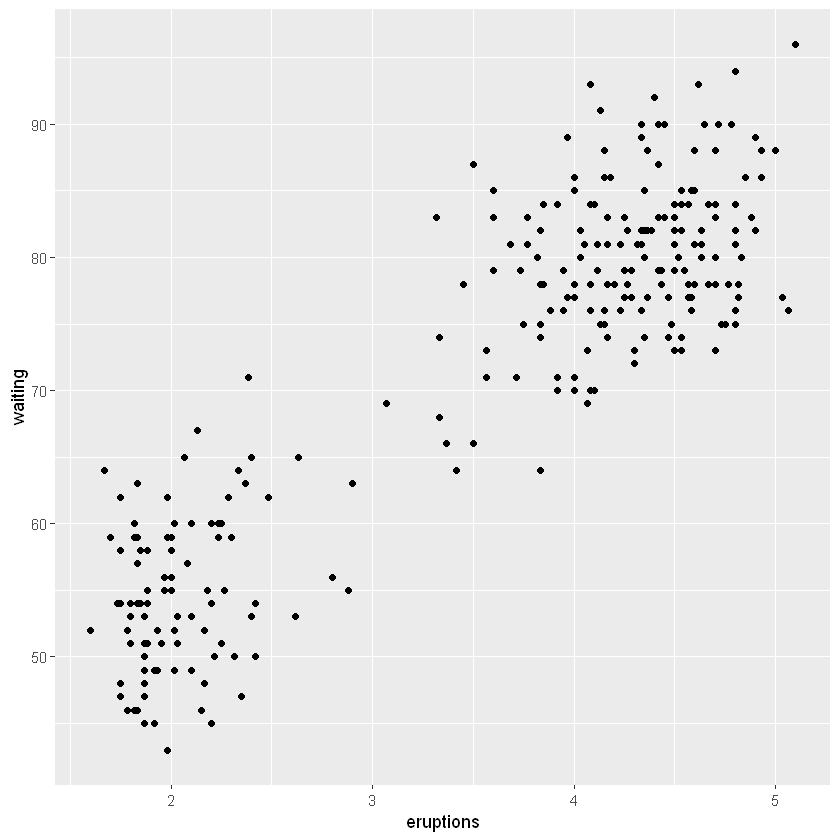

In [44]:
# Page 105
# faithfull case study

ggplot(data = faithful) +
geom_point(mapping = aes(x = eruptions, y = waiting))


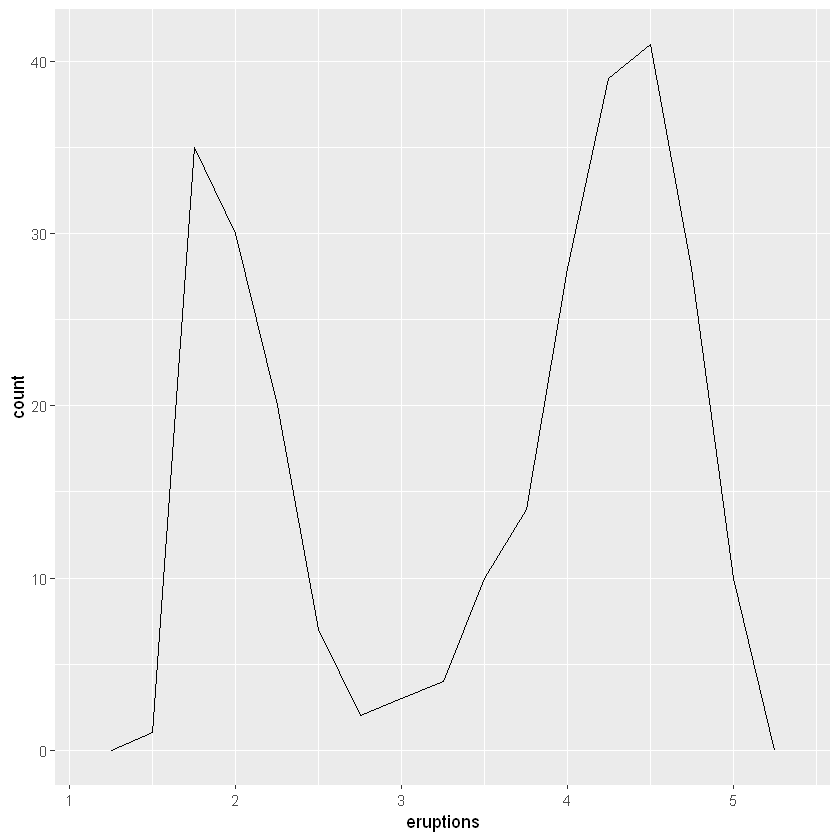

In [45]:
ggplot(faithful, aes(eruptions)) +
    geom_freqpoly(binwidth = 0.25)